 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


127.0.0.1 - - [09/Feb/2024 16:24:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Feb/2024 16:24:23] "GET /static/main.css HTTP/1.1" 200 -
127.0.0.1 - - [09/Feb/2024 16:24:32] "POST /login HTTP/1.1" 302 -
127.0.0.1 - - [09/Feb/2024 16:24:32] "GET /dashboard HTTP/1.1" 200 -
127.0.0.1 - - [09/Feb/2024 16:24:32] "GET /static/main.css HTTP/1.1" 304 -
127.0.0.1 - - [09/Feb/2024 16:24:33] "GET /write_post HTTP/1.1" 200 -
127.0.0.1 - - [09/Feb/2024 16:24:33] "GET /static/main.css HTTP/1.1" 304 -
[2024-02-09 16:24:37,752] ERROR in app: Exception on /write_post [POST]
Traceback (most recent call last):
  File "c:\Users\Utilisateur2\anaconda3\envs\devSalah_Flask\lib\site-packages\flask\app.py", line 1463, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Utilisateur2\anaconda3\envs\devSalah_Flask\lib\site-packages\flask\app.py", line 872, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Utilisateur2\anaconda3\envs\devSalah_Flask\lib\site-package

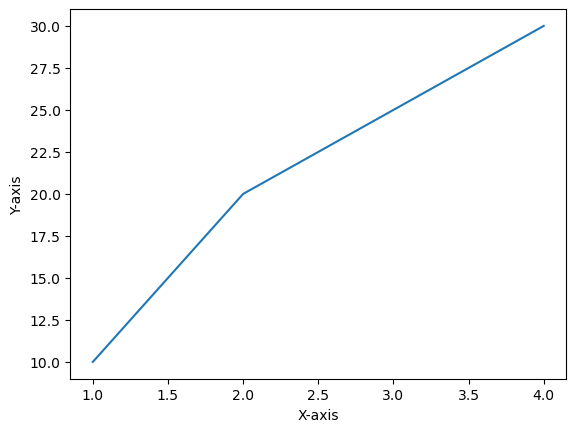

In [6]:
from flask import Flask, render_template, request, redirect, url_for, session
import matplotlib.pyplot as plt
import os

app = Flask(__name__)
app.secret_key = 'your_secret_key'  # Change this to a secret key for session management

# Mock database for demonstration purposes
users = {'user1': {'password': 'pass1', 'posts': []},
         'user2': {'password': 'pass2', 'posts': []}}

@app.route('/')
def index():
    if 'username' in session:
        return redirect(url_for('dashboard'))
    return render_template('login.html')

@app.route('/login', methods=['POST'])
def login():
    username = request.form['username']
    password = request.form['password']

    if username in users and users[username]['password'] == password:
        session['username'] = username
        return redirect(url_for('dashboard'))
    else:
        return 'Invalid username or password'

@app.route('/logout')
def logout():
    session.pop('username', None)
    return redirect(url_for('index'))

@app.route('/dashboard')
def dashboard():
    if 'username' in session:
        username = session['username']
        user_posts = users[username]['posts']
        return render_template('dashboard.html', username=username, user_posts=user_posts)
    else:
        return redirect(url_for('index'))

@app.route('/write_post', methods=['GET', 'POST'])
def write_post():
    if 'username' in session:
        if request.method == 'POST':
            username = session['username']
            post_content = request.form['post_content']
            users[username]['posts'].append(post_content)

            # Example: Generate a simple plot using matplotlib
            plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plot_path = f'\\plots\\{username}_plot.png'
            plt.savefig(os.path.join(app.static_folder, plot_path))
            plt.close()

            return render_template('write_post.html', plot_path=plot_path)

        return render_template('write_post.html')
    else:
        return redirect(url_for('index'))

if __name__ == '__main__':
    app.run()